In [0]:
from datetime import datetime
import datetime as dt
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Sklearn
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
data = pd.read_csv("Data/column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [0]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [0]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [0]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

array([[<Axes: xlabel='pelvic_incidence', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_tilt numeric', ylabel='pelvic_incidence'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_incidence'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_incidence'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_incidence'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='pelvic_tilt numeric', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_tilt numeric'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt numeric'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='pelvic_tilt numeric', yl

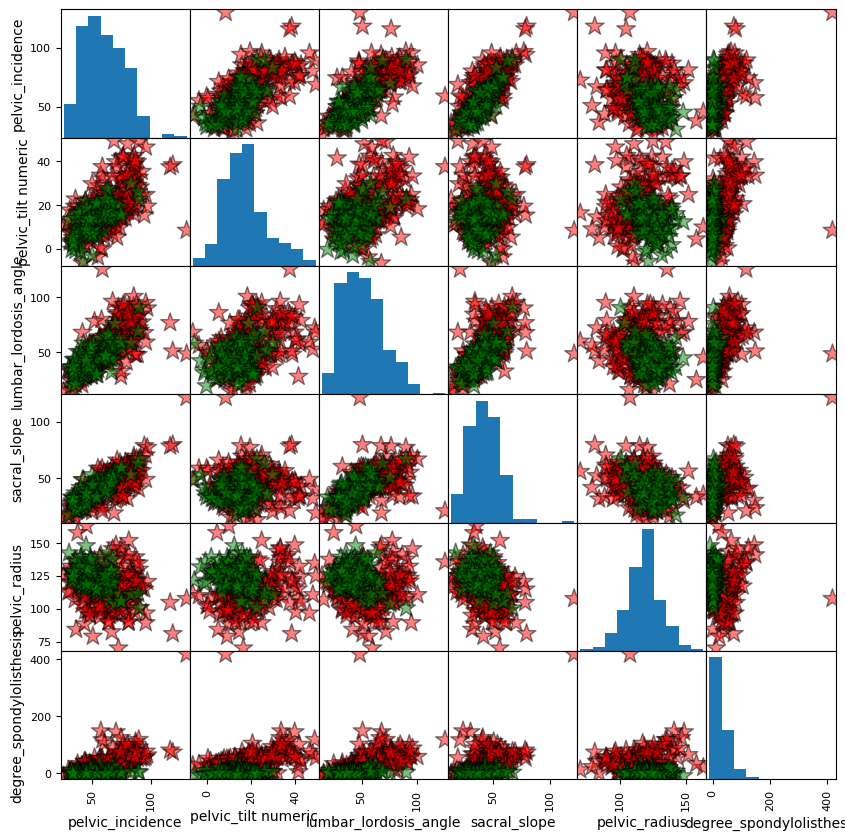

In [0]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:, 'class']]

pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                           c=color_list,
                           figsize=[10,10],
                           diagonal='hist',
                           alpha=0.5,
                           s=200,
                           marker = '*',
                           edgecolor = "black"
                           )

### Similar to Demo: Basic Machine Learning Part – 1


In [0]:
x = data.loc[:, data.columns!='class']
y = data.loc[:, 'class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.predict(x_test)
log_reg.score(x_test, y_test)

0.8817204301075269

### Similar to Demo: Basic Machine Learning Part – 2

In [0]:
x = data.loc[:, data.columns!='class']
y = data.loc[:, 'class']

x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.predict(x_test)
log_reg.score(x_test, y_test)

0.9032258064516129

# 📌 What is the K-Nearest Neighbor (KNN) Algorithm?

🎥 **Video Title:** What is the K-Nearest Neighbor (KNN) Algorithm?  
👨‍🏫 **Creator:** [IBM Technology](https://www.youtube.com/@IBMTechnology)  
🔗 **Watch here:** [YouTube Video](https://www.youtube.com/watch?v=b6uHw7QW_n4)  
🖼️ **Thumbnail:**  
![KNN](https://i.ytimg.com/vi/b6uHw7QW_n4/hqdefault.jpg)

---

## 🚀 KNN in a Nutshell

K-Nearest Neighbors (KNN) is a **supervised learning algorithm** used for both **classification and regression**, based on the concept of **similarity proximity**.

---

## 📊 Key Concepts Explained

### 📌 1. Core Principle
- KNN classifies data based on how its **features compare to its "K" nearest neighbors**.
- It assumes that similar things exist near each other.

### 🍏 2. Fruit Example
- Features: **Sweetness (x-axis)** & **Crunchiness (y-axis)**.
- New data points are classified by checking proximity to existing labeled data (e.g., apples vs oranges).

### 🧮 3. Distance Metrics
- Measures proximity using:
  - **Euclidean Distance**
  - **Manhattan Distance**
- Visualization: **Voronoi Diagrams** are used to show decision boundaries.

### 🔢 4. Choosing the Right ‘K’
- **K = 1**: Assign class of nearest neighbor.
- Larger K values smooth the model’s decisions.
- Use **odd K values** to avoid classification ties.

---

## ⚖️ Pros & Cons of KNN

### ✅ Strengths
- ✅ Simple and intuitive
- ✅ Few hyperparameters (just K & distance metric)
- ✅ Learns in real-time as new data is added

### ❌ Weaknesses
- ❌ Poor scalability with large datasets (lazy learning = memory-intensive)
- ❌ Suffers from the **curse of dimensionality**
- ❌ High sensitivity to noisy or irrelevant features

---
## 🔍 Exploring the Impact of K: Overfitting vs. Underfitting

Choosing the right value of **K** in the K-Nearest Neighbor algorithm is crucial — it directly impacts the model’s **bias-variance tradeoff** and overall performance.

---

### 🔢 What Does ‘K’ Really Mean?

- The **K** in KNN refers to the number of nearest data points used to determine a prediction for a new instance.
- You can think of it as "how many friends you're asking for advice" before deciding.

---

### 📈 Low K Value = High Variance (Overfitting)

- Example: **K = 1**
  - The model simply chooses the **closest neighbor**.
  - This can lead to **overfitting** because it's overly sensitive to noise or outliers.
  - Every tiny fluctuation in the dataset affects predictions.
  
📉 **Overfitting Symptoms:**
- Excellent training accuracy, but poor generalization to new data.
- Highly irregular decision boundaries.

---

### 📉 High K Value = High Bias (Underfitting)

- Example: **K = 15 or 20**
  - The model averages over many neighbors, potentially from different classes.
  - Can lead to **underfitting**, as it smooths out local patterns.
  
📉 **Underfitting Symptoms:**
- Model is too simplistic to capture complex patterns.
- Poor training **and** test performance.

---

### 🎯 How to Choose the Best K?

✅ **Best Practices:**
- Use **cross-validation** to test different K values and find the sweet spot.
- Choose an **odd value** of K to avoid tie votes in binary classification.
- Try plotting an **error rate vs. K** graph — this can help visualize where underfitting and overfitting happen.

🛠️ **Typical Range:**  
- Start testing with K values in the range **3–15**.
- Use **grid search** or other hyperparameter tuning tools for optimization.

---

### ⚠️ Bonus Tips

- **Data Scaling Matters:** Always scale features (e.g., with StandardScaler) before applying KNN, or else distance-based metrics become unreliable.
- **Dimensionality:** Too many features can dilute distance comparisons (curse of dimensionality), making the choice of K even harder.

---



## 🏥 Real-World Applications

- 🧬 **Healthcare:** Predicting disease risk (e.g., heart attacks, prostate cancer)
- 💸 **Finance:** Stock prediction, fraud detection
- 🛠️ **Missing Data Imputation:** Estimating unknown values
- 📺 **Recommendation Systems:** Suggesting products, movies, etc.

---


## Classification using KNeighborsClassifier

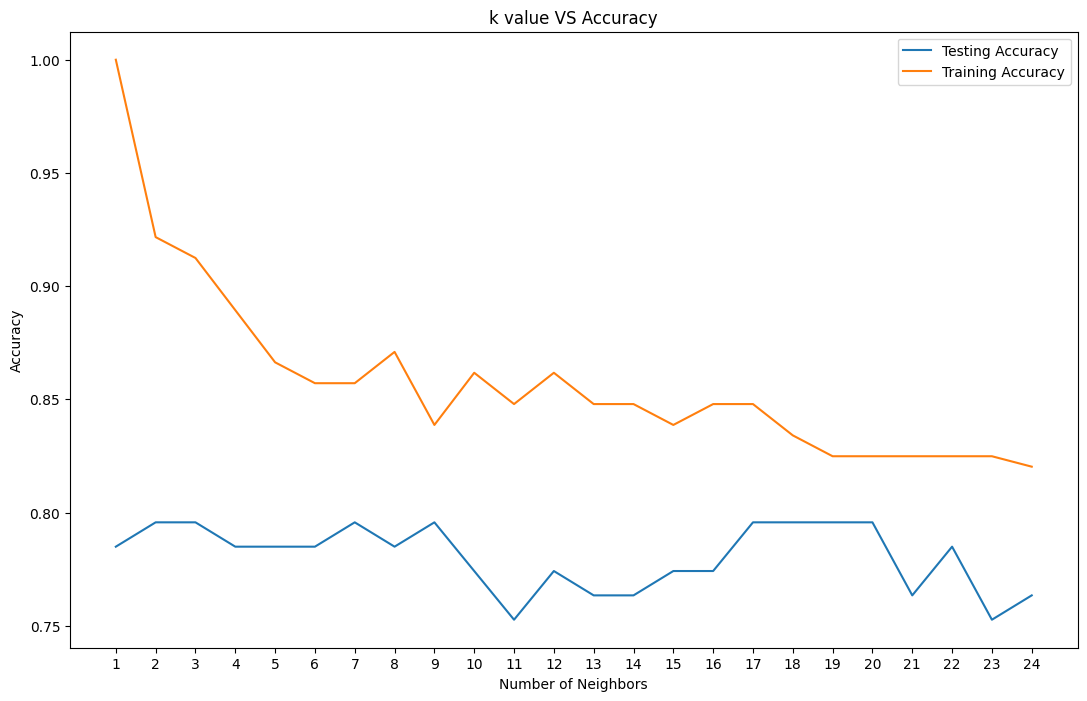

Best accuracy is 0.7956989247311828 with K = 2


In [0]:
x = data.loc[:, data.columns!='class']
y = data.loc[:, 'class']

x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    train_accuracy.append(knn.score(x_train, y_train))

    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

# Regression
I will use one dataset that I found on Kaggle

In [0]:
data = pd.read_csv("Data/weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [0]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [0]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [0]:
data['Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce', utc=True)
data = data.dropna(subset=['Date'])
data['Date'] = pd.to_datetime(data['Date'], utc=True)  
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
display(data.head())

Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222222222222,7.388888888888888,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31T22:00:00.000Z,2006,3,31,22
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31T23:00:00.000Z,2006,3,31,23
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01T00:00:00.000Z,2006,4,1,0
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01T01:00:00.000Z,2006,4,1,1
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755555555555553,6.977777777777779,0.83,11.0446,259.0,15.826300000000002,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01T02:00:00.000Z,2006,4,1,2


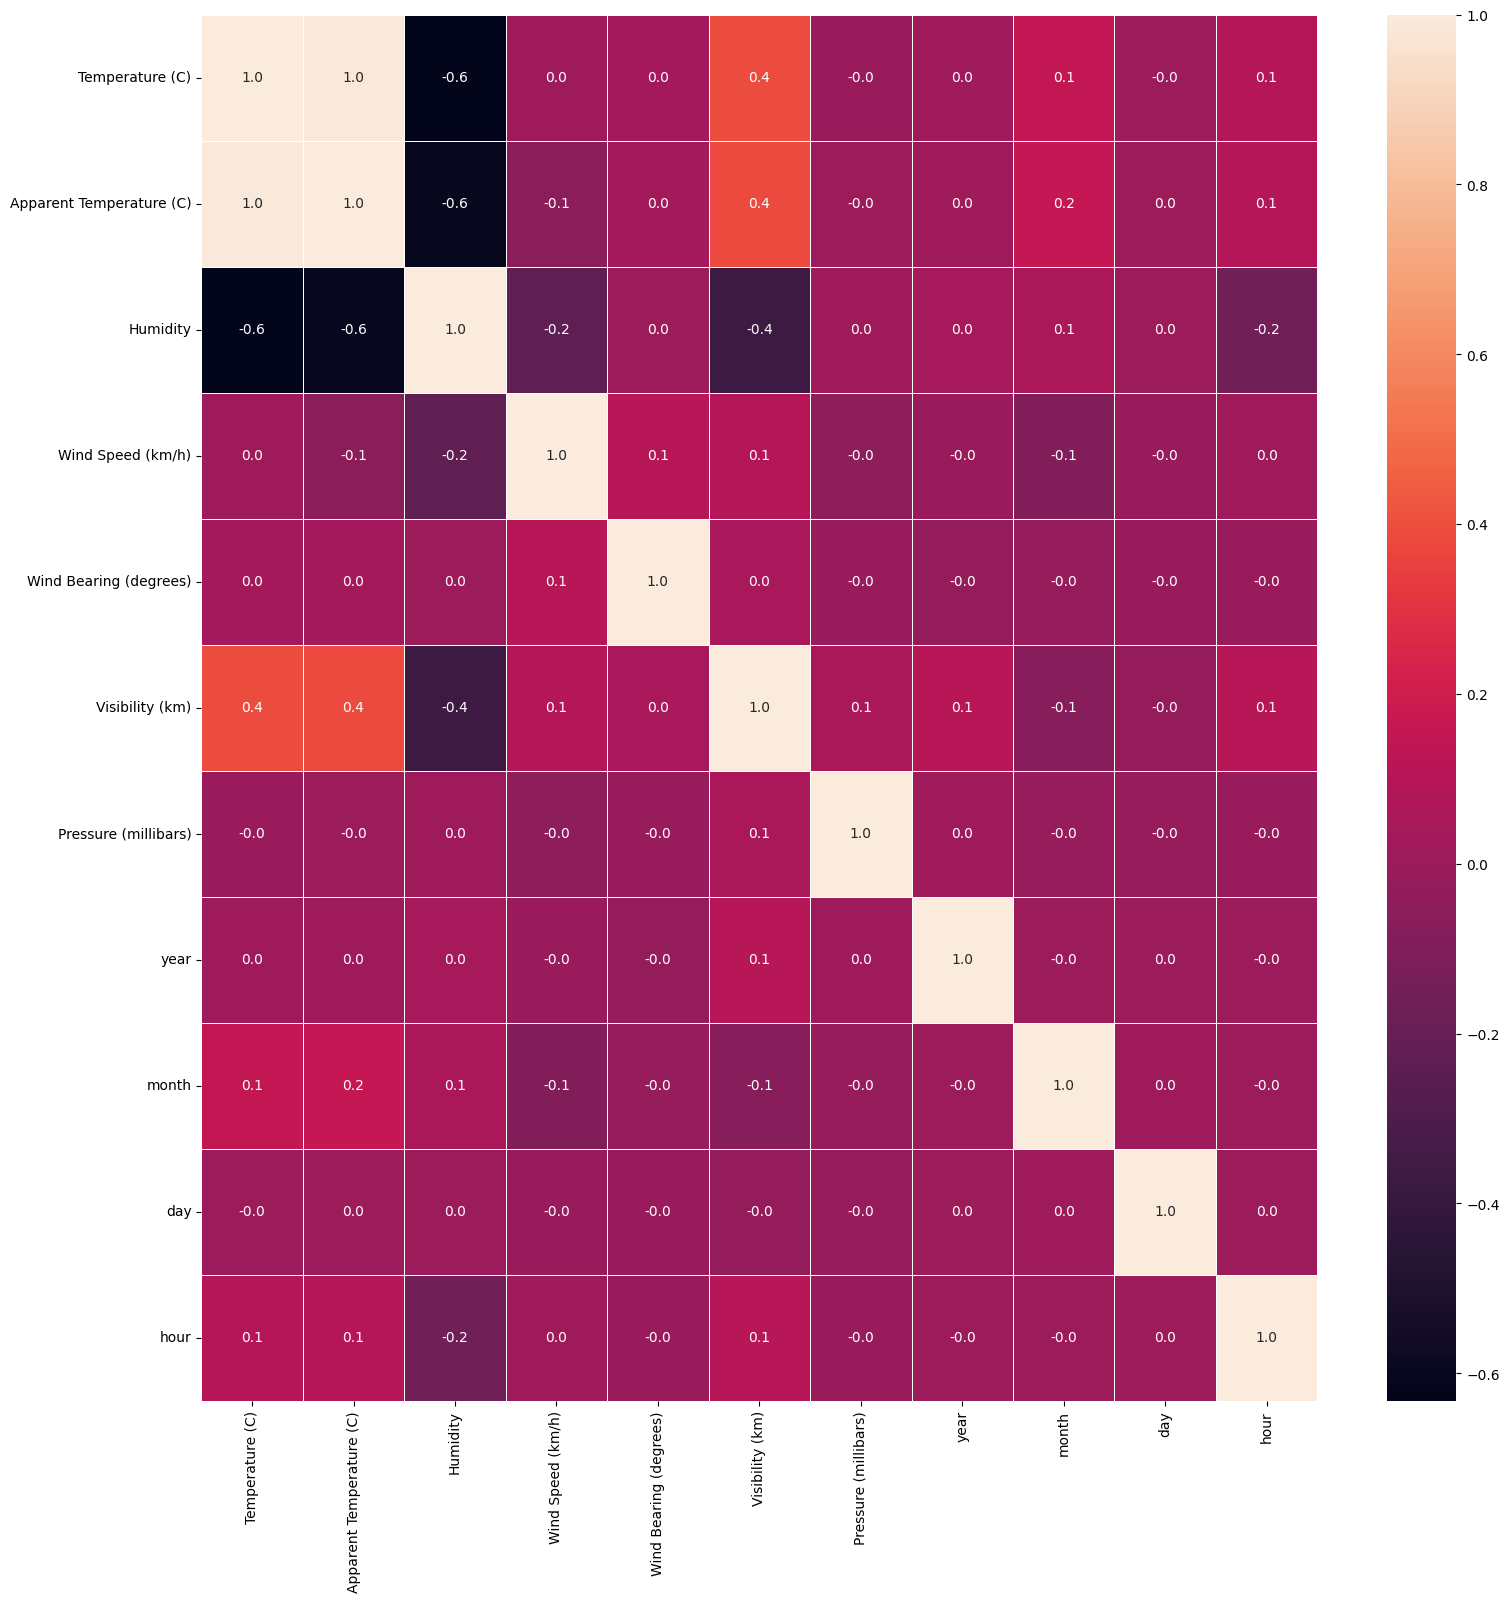

In [0]:
data = data.drop('Loud Cover', axis = 1)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [0]:
data = data.drop(['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)', 'Formatted Date'], axis = 1)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Daily Summary,Date,year,month,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,15.8263,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,15.8263,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,14.9569,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,15.8263,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,15.8263,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


In [0]:
data[data['Precip Type'].isnull()].head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Daily Summary,Date,year,month,day,hour
52672,Mostly Cloudy,NaN,19.016667,19.016667,0.26,9.982,Mostly cloudy until night.,2012-04-11 14:00:00+00:00,2012,4,11,14
52674,Mostly Cloudy,NaN,17.850000,17.850000,0.28,9.982,Mostly cloudy until night.,2012-04-11 16:00:00+00:00,2012,4,11,16
52675,Mostly Cloudy,NaN,16.322222,16.322222,0.32,9.982,Mostly cloudy until night.,2012-04-11 17:00:00+00:00,2012,4,11,17
52677,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.982,Mostly cloudy until night.,2012-04-11 19:00:00+00:00,2012,4,11,19
52678,Mostly Cloudy,NaN,12.927778,12.927778,0.47,16.100,Mostly cloudy until night.,2012-04-11 20:00:00+00:00,2012,4,11,20


In [0]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [0]:
data['Precip Type'].fillna('no', inplace=True)

In [0]:
data['Precip Type'].unique()

array(['rain', 'snow', 'no'], dtype=object)

In [0]:
le = LabelEncoder()
data['Summary_encoded'] = le.fit_transform(data['Summary'])
data['Precip_Type_encoded'] = le.fit_transform(data['Precip Type'])
data['Daily_Summary_encoded'] = le.fit_transform(data['Daily Summary'])
data.drop(['Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Date,year,month,day,hour,Summary_encoded,Precip_Type_encoded,Daily_Summary_encoded
0,9.472222,7.388889,0.89,15.8263,2006-03-31 22:00:00+00:00,2006,3,31,22,19,1,197
1,9.355556,7.227778,0.86,15.8263,2006-03-31 23:00:00+00:00,2006,3,31,23,19,1,197
2,9.377778,9.377778,0.89,14.9569,2006-04-01 00:00:00+00:00,2006,4,1,0,17,1,197
3,8.288889,5.944444,0.83,15.8263,2006-04-01 01:00:00+00:00,2006,4,1,1,19,1,197
4,8.755556,6.977778,0.83,15.8263,2006-04-01 02:00:00+00:00,2006,4,1,2,17,1,197


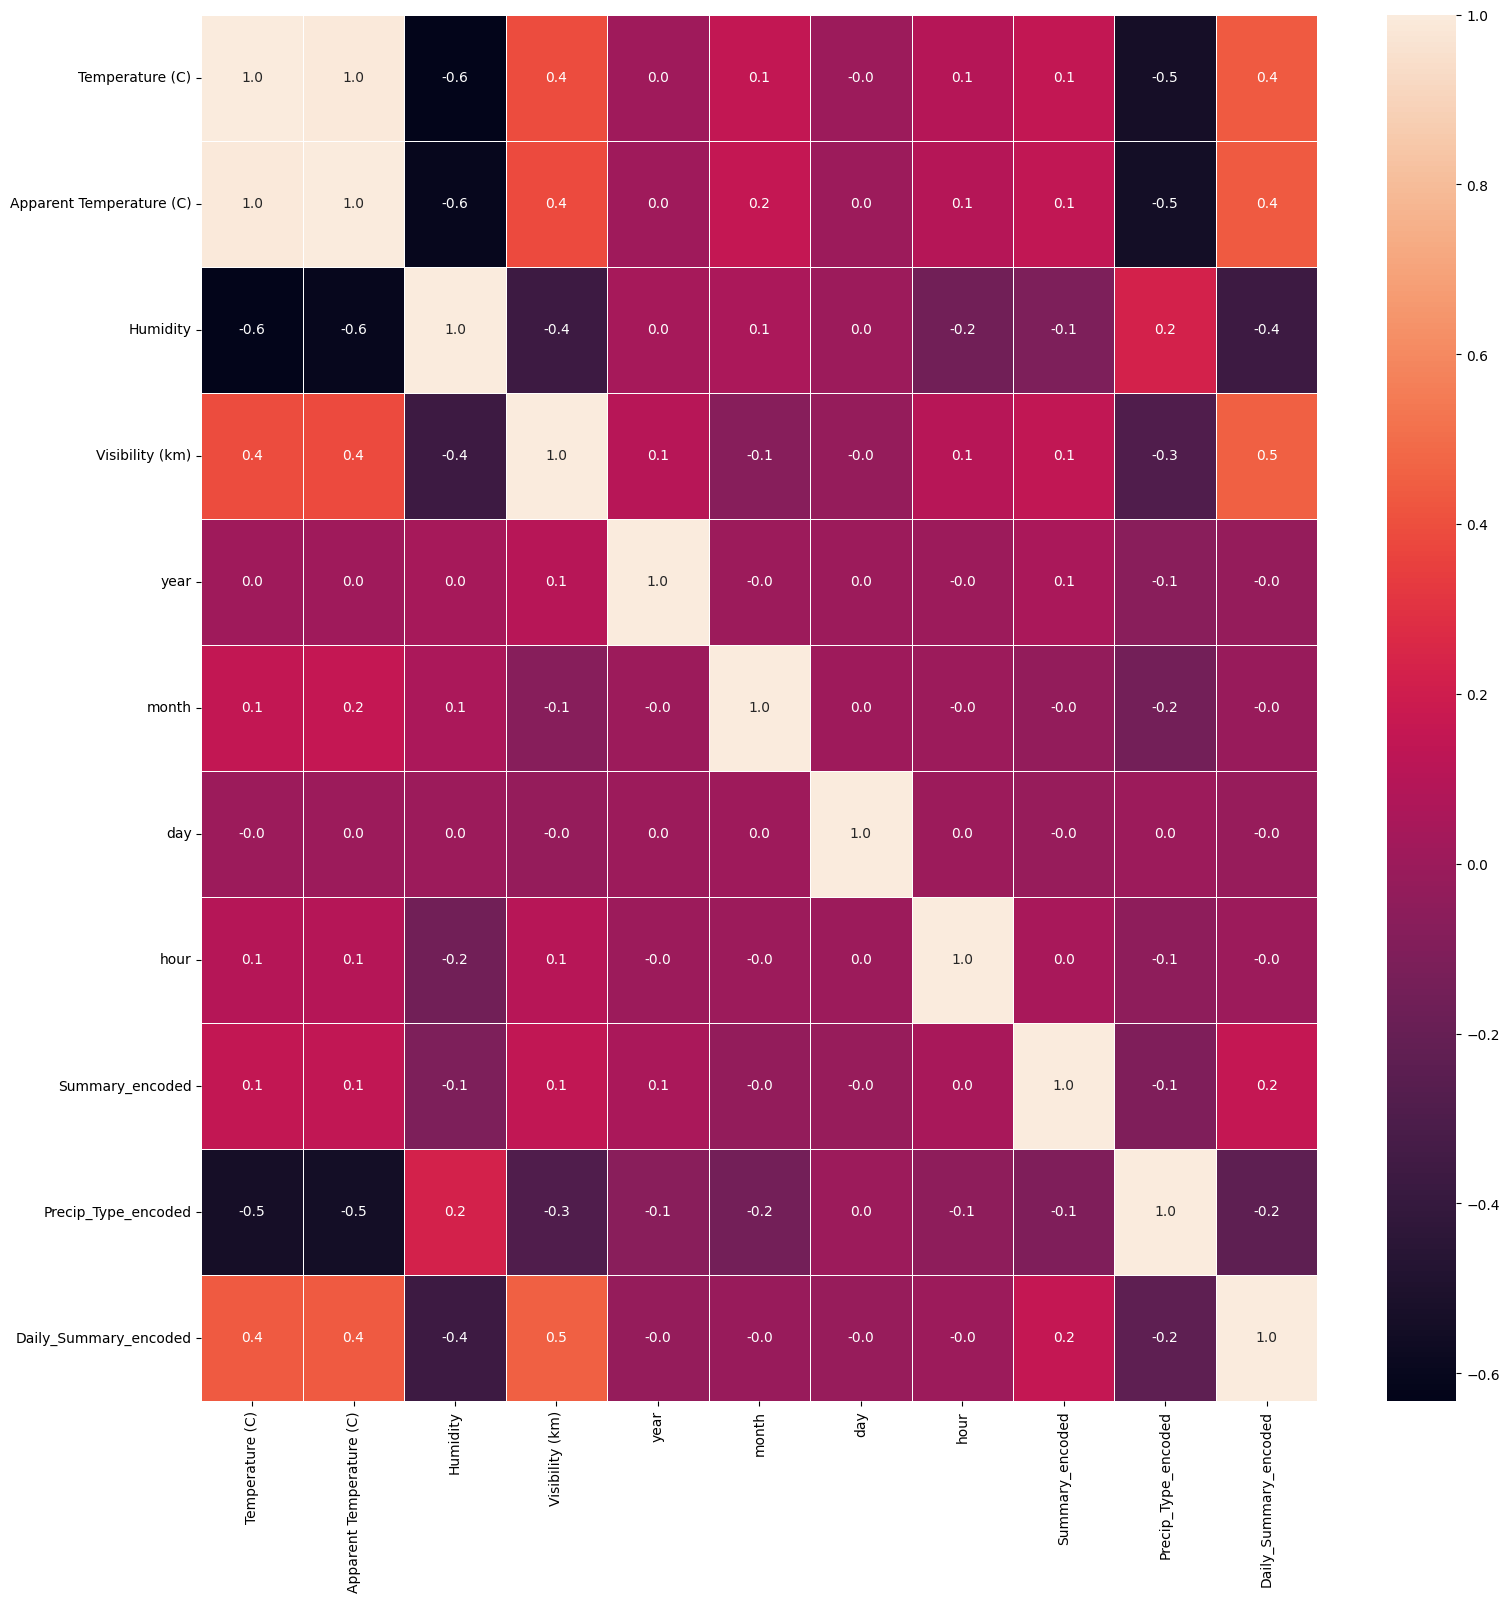

In [0]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [0]:
data = data.drop(['year', 'Summary_encoded', 'Apparent Temperature (C)', 'Date'], axis = 1)
data.head()

,Temperature (C),Humidity,Visibility (km),month,day,hour,Precip_Type_encoded,Daily_Summary_encoded
0,9.472222,0.89,15.8263,3,31,22,1,197
1,9.355556,0.86,15.8263,3,31,23,1,197
2,9.377778,0.89,14.9569,4,1,0,1,197
3,8.288889,0.83,15.8263,4,1,1,1,197
4,8.755556,0.83,15.8263,4,1,2,1,197


In [0]:
X = data.drop(['Temperature (C)'], axis=1)
y = data['Temperature (C)']
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)


0.6028053203418234

In [0]:
X = data.drop(['Temperature (C)'], axis=1)
y = data['Temperature (C)']
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.9407448202370122

In [0]:
X = data.drop(['Temperature (C)'], axis=1)
y = data['Temperature (C)']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("R² (cross-val):", np.mean(scores))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

print("R²:", model.score(X_test, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² (cross-val): 0.9374590593520541
R²: 0.9404206068455219
MAE: 1.718512860515562
RMSE: 2.3312370990441953
